In [4]:
import pandas as pd
import sqlite3
import matplotlib as plt
import seaborn as sns

In [5]:
!ls
!cd data


Alex-Notebook.ipynb README.md           movie_data_erd.jpeg utku.ipynb
CONTRIBUTING.md     awesome.gif         project.key
LICENSE.md          data                student.ipynb


In [6]:
bom = pd.read_csv('data/bom.movie_gross.csv')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
rt = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [8]:
type(rt['runtime'][0])

str

In [9]:
rt['runtime'] = rt['runtime'].str.extract('(\d+)')

In [10]:
rt['runtime'].dropna(inplace=True)

In [11]:
rt['runtime'] = rt['runtime'].dropna().astype(int)

<AxesSubplot:ylabel='Frequency'>

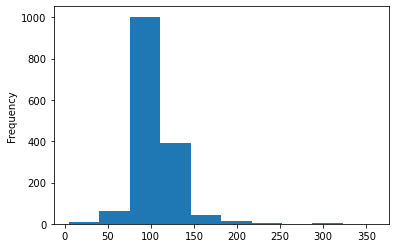

In [12]:
rt['runtime'].plot.hist(bins = 10)

In [13]:
rt['runtime'].describe()

count    1530.000000
mean      103.967974
std        24.642392
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [14]:
cd data/

/Users/utkle/Desktop/Flatiron/PROJECTS/dsc-phase-1-project-Alex-Utku/data


In [15]:
ls

archive/              rt.movie_info.tsv     tn.movie_budgets.csv
bom.movie_gross.csv   rt.reviews.tsv
im.db                 tmdb.movies.csv


In [16]:
rtrew = pd.read_csv('../data/rt.reviews.tsv', delimiter = '\t', encoding= 'latin-1')
rtrew

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [17]:
!ls


archive              rt.movie_info.tsv    tn.movie_budgets.csv
bom.movie_gross.csv  rt.reviews.tsv
im.db                tmdb.movies.csv


In [18]:
rtrew.duplicated().value_counts()

False    54423
True         9
dtype: int64

In [22]:
tn = pd.read_csv('../data/tn.movie_budgets.csv')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [23]:
#Budget and gross data is string, needs to be integer to do data analysis.

#Removing the '$' sign from data.
tn['domestic_gross']=tn['domestic_gross'].str.replace('$', '')
tn['production_budget']=tn['production_budget'].str.replace('$', '')
tn['worldwide_gross']=tn['worldwide_gross'].str.replace('$','')
#Removing the ',' sign from data.
tn['worldwide_gross']=tn['worldwide_gross'].str.replace(',','')
tn['domestic_gross']=tn['domestic_gross'].str.replace(',', '')
tn['production_budget']=tn['production_budget'].str.replace(',', '')
#Finally changing data type to integer.
tn['domestic_gross']=tn['domestic_gross'].astype('int64')
tn['production_budget']=tn['production_budget'].astype('int64')
tn['worldwide_gross']=tn['worldwide_gross'].astype('int64')

In [24]:
#I'm changing release date to year(int) only to help me with merging my final dataframe.
tn['release_date'] = tn['release_date'].map(lambda x: x[-4:]).astype('int64')
tn['release_date'] 

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_date, Length: 5782, dtype: int64

In [25]:
#I need to create a new column for profit.
tn['profit'] = tn['domestic_gross'] + tn['worldwide_gross'] - tn['production_budget']

In [26]:
x = tn['release_date'][0]
x[-4:]

IndexError: invalid index to scalar variable.

In [30]:
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
...,...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,0,0,-7000
5778,79,1999,Following,6000,48482,240495,282977
5779,80,2005,Return to the Land of Wonders,5000,1338,1338,-2324
5780,81,2015,A Plague So Pleasant,1400,0,0,-1400


In [31]:
tn.sort_values('profit')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
194,95,2020,Moonfall,150000000,0,0,-150000000
341,42,2019,Men in Black: International,110000000,3100000,3100000,-103800000
479,80,2017,Bright,90000000,0,0,-90000000
480,81,2019,Army of the Dead,90000000,0,0,-90000000
...,...,...,...,...,...,...,...
33,34,2015,Jurassic World,215000000,652270625,1648854864,2086125489
6,7,2018,Avengers: Infinity War,300000000,678815482,2048134200,2426949682
42,43,1997,Titanic,200000000,659363944,2208208395,2667572339
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445


In [43]:
tmdb = pd.read_csv('../data/tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [45]:
conn = sqlite3.connect('../data/im.db')
imdb = pd.read_sql("""
    SELECT *
    FROM sqlite_master;

""", conn)
imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [54]:
director_id = pd.read_sql("""
    SELECT *
    FROM directors;
    
    
""", conn).drop_duplicates()

In [54]:
director_id = pd.read_sql("""
    SELECT *
    FROM directors;
    
    
""", conn).drop_duplicates()

In [55]:
director_id 

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [56]:
director_name = pd.read_sql("""
    SELECT *
    FROM persons;
    
    
""", conn)
director_name

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [85]:
director_names = director_id.merge(director_name, how='inner', on='person_id')
director_names = director_names.dropna(subset=['primary_profession'])
director_names.drop(['birth_year','death_year'], axis=1, inplace=True)
director_names

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0859635,nm0151540,Jay Chandrasekhar,"director,actor,writer"
4,tt0878654,nm0089502,Albert Pyun,"director,writer,producer"
...,...,...,...,...
163527,tt8998302,nm10121510,Daryl Boman,"producer,director,writer"
163529,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
163530,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
163531,tt9001494,nm10123242,Tate Nova,"director,producer"


In [190]:
#Clearing the data by removing movies without runtime info.

imdb_runtime_ratings = pd.read_sql("""SELECT *
FROM movie_ratings
JOIN movie_basics
USING (movie_id)
""", conn)

imdb_runtime_ratings.dropna(inplace=True)

In [191]:
imdb_runtime_ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [192]:
imdb_all = imdb_runtime_ratings.merge(director_names, how='inner', on = 'movie_id')
imdb_all

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,nm8353804,Sukh Sanghera,"director,cinematographer,location_management"
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,nm9932562,George Llewelyn-John,"director,cinematographer,writer"
2,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,nm9250842,Caolan Robertson,"producer,director,writer"
3,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,nm1915232,Marcel Grant,"director,writer,producer"
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",nm0001317,Renny Harlin,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...
76490,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary,nm10249999,Richard Willett,"director,composer,editor"
76491,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary,nm3828616,Alexandru Mavrodineanu,"director,writer,cinematographer"
76492,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",nm0849465,Gorô Taniguchi,"director,art_department,writer"
76493,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary,nm0001206,Abel Ferrara,"director,writer,soundtrack"


In [312]:
a = 'Adventure'
imdb_all_adventure = imdb_all.loc[(imdb_all['genres'].str.contains(a))]
imdb_all_adventure

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",nm0001317,Renny Harlin,"producer,director,writer"
10,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",nm2874896,Dean Gold,"producer,director,writer"
13,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm0540962,Mathias Malzieu,"actor,writer,director"
14,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm1071849,Stéphane Berla,"director,writer,composer"
18,tt1220911,5.0,941,Why I Did (Not) Eat My Father,Pourquoi j'ai pas mangé mon père,2015,101.0,"Adventure,Animation,Comedy",nm0213354,Jamel Debbouze,"actor,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...
76394,tt8258296,8.7,10,Heroes of Destiny II,Heroes del Destino II,2018,71.0,"Adventure,Comedy,Fantasy",nm6216421,Pauli Janhunen Calderón,"director,actor,cinematographer"
76401,tt8370876,5.2,22,Indiana Jones and the Crown of Thorns,Indiana Jones and the Crown of Thorns,2018,54.0,Adventure,nm4159476,Jonatan Jiménez,"cinematographer,camera_department,director"
76477,tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82.0,"Action,Adventure,Animation",nm1425958,Katsushi Sakurabi,"director,animation_department,art_department"
76482,tt9591766,6.7,9,White Forehead 3,White Forehead 3,2019,90.0,"Adventure,Family,Fantasy",nm2777927,Javad Hashemi,"actor,director,writer"


In [313]:
# Removing movies older than 2013(<200 mins)

imdb_all_adventure = imdb_all_adventure[imdb_all_adventure['start_year'] >= 2013]
imdb_all_adventure

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",nm0001317,Renny Harlin,"producer,director,writer"
10,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",nm2874896,Dean Gold,"producer,director,writer"
13,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm0540962,Mathias Malzieu,"actor,writer,director"
14,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm1071849,Stéphane Berla,"director,writer,composer"
18,tt1220911,5.0,941,Why I Did (Not) Eat My Father,Pourquoi j'ai pas mangé mon père,2015,101.0,"Adventure,Animation,Comedy",nm0213354,Jamel Debbouze,"actor,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...
76394,tt8258296,8.7,10,Heroes of Destiny II,Heroes del Destino II,2018,71.0,"Adventure,Comedy,Fantasy",nm6216421,Pauli Janhunen Calderón,"director,actor,cinematographer"
76401,tt8370876,5.2,22,Indiana Jones and the Crown of Thorns,Indiana Jones and the Crown of Thorns,2018,54.0,Adventure,nm4159476,Jonatan Jiménez,"cinematographer,camera_department,director"
76477,tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82.0,"Action,Adventure,Animation",nm1425958,Katsushi Sakurabi,"director,animation_department,art_department"
76482,tt9591766,6.7,9,White Forehead 3,White Forehead 3,2019,90.0,"Adventure,Family,Fantasy",nm2777927,Javad Hashemi,"actor,director,writer"


In [314]:
#Removing the outlier runtimes(<200 mins)

imdb_all_adventure = imdb_all_adventure[imdb_all_adventure['runtime_minutes'] < 200]
imdb_all_adventure

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",nm0001317,Renny Harlin,"producer,director,writer"
10,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",nm2874896,Dean Gold,"producer,director,writer"
13,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm0540962,Mathias Malzieu,"actor,writer,director"
14,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",nm1071849,Stéphane Berla,"director,writer,composer"
18,tt1220911,5.0,941,Why I Did (Not) Eat My Father,Pourquoi j'ai pas mangé mon père,2015,101.0,"Adventure,Animation,Comedy",nm0213354,Jamel Debbouze,"actor,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...
76394,tt8258296,8.7,10,Heroes of Destiny II,Heroes del Destino II,2018,71.0,"Adventure,Comedy,Fantasy",nm6216421,Pauli Janhunen Calderón,"director,actor,cinematographer"
76401,tt8370876,5.2,22,Indiana Jones and the Crown of Thorns,Indiana Jones and the Crown of Thorns,2018,54.0,Adventure,nm4159476,Jonatan Jiménez,"cinematographer,camera_department,director"
76477,tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82.0,"Action,Adventure,Animation",nm1425958,Katsushi Sakurabi,"director,animation_department,art_department"
76482,tt9591766,6.7,9,White Forehead 3,White Forehead 3,2019,90.0,"Adventure,Family,Fantasy",nm2777927,Javad Hashemi,"actor,director,writer"


In [329]:
# Adding profits from TheNumbers dataset to Imdb dataset.

profit_rating = imdb_runtime_ratings.merge(tn, how='inner', left_on = ['primary_title', 'start_year'], 
                right_on=['movie', 'release_date'])
profit_rating

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,2014,The Legend of Hercules,70000000,18848538,58953319,7801857
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,2013,Baggage Claim,8500000,21569509,22885836,35955345
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,2011,Moneyball,50000000,75605492,111300835,136906327
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,2010,Hereafter,50000000,32746941,108660270,91407211
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",44,2012,21 Jump Street,42000000,138447667,202812429,299260096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",94,2018,Game Night,37000000,69179066,117378084,149557150
1486,tt2723576,4.9,632,The Sleepwalker,The Sleepwalker,2014,91.0,Drama,2,2014,The Sleepwalker,1100000,2636,2636,-1094728
1487,tt2980210,6.1,36062,A Hologram for the King,A Hologram for the King,2016,98.0,"Comedy,Drama,Romance",47,2016,A Hologram for the King,35000000,4212494,11846010,-18941496
1488,tt3125324,6.9,14122,Beyond the Lights,Beyond the Lights,2014,116.0,"Drama,Music,Romance",16,2014,Beyond the Lights,7000000,14618727,14618727,22237454


In [330]:
#Checking the movies after 2013 in Adventure genre.
profit_rating = profit_rating.loc[profit_rating['start_year']>=2013]
a = 'Adventure'
profit_rating = profit_rating.loc[(profit_rating['genres'].str.contains(a))]
profit_rating

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,2014,The Legend of Hercules,70000000,18848538,58953319,7801857
17,tt1663202,8.0,621193,The Revenant,The Revenant,2015,156.0,"Action,Adventure,Biography",27,2015,The Revenant,135000000,183637894,532938302,581576196
27,tt1517260,5.9,105633,The Host,The Host,2013,125.0,"Action,Adventure,Drama",68,2013,The Host,50000000,26623701,64477051,41100752
31,tt1618442,6.0,86118,The Last Witch Hunter,The Last Witch Hunter,2015,106.0,"Action,Adventure,Fantasy",96,2015,The Last Witch Hunter,80000000,27367660,130818912,78186572
32,tt1709143,5.5,33137,The Last Days on Mars,The Last Days on Mars,2013,98.0,"Adventure,Horror,Sci-Fi",25,2013,The Last Days on Mars,10600000,24084,261364,-10314552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,tt1946502,4.5,1176,UglyDolls,UglyDolls,2019,87.0,"Adventure,Animation,Comedy",6,2019,UglyDolls,45000000,19894664,24644664,-460672
1479,tt1985966,6.4,81010,Cloudy with a Chance of Meatballs 2,Cloudy with a Chance of Meatballs 2,2013,95.0,"Adventure,Animation,Comedy",13,2013,Cloudy with a Chance of Meatballs 2,78000000,119793567,274392649,316186216
1482,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,"Action,Adventure,Thriller",96,2014,The Expendables 3,100000000,39322544,209461378,148783922
1483,tt2334871,4.5,29997,Snatched,Snatched,2017,90.0,"Action,Adventure,Comedy",51,2017,Snatched,42000000,45852178,57852177,61704355


0.5226621755264812

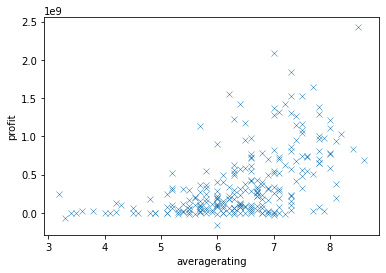

In [332]:
sns.scatterplot( x=profit_rating['averagerating'], y=profit_rating['profit'], marker = 'x')
profit_rating.corr()['averagerating']['profit']

/Users/utkle/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='averagerating', ylabel='Density'>

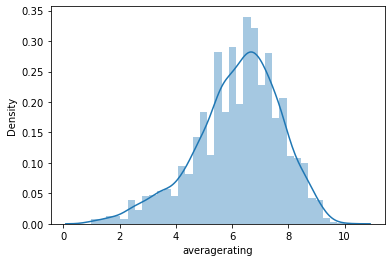

In [228]:
# library & dataset


# use the function regplot to make a scatterplot
#sns.scatterplot(data = imdb_all_adventure, x=imdb_all_adventure['averagerating'], y=imdb_all_adventure['primary_name'], s = 10, marker = 'x')
#sns.kdeplot(imdb_all_adventure['averagerating'])
#sns.distplot(imdb_all_adventure['averagerating'])